## Prepaid Product

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
# import os

## Import Data Source

In [31]:
data_src = "../Raw-Agg Perf Nationwide_Wk 2023021.csv"
df = pd.read_csv(data_src, low_memory=False)
cols = ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'TM_KEY_YR', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'AGG_TYPE', 'RR_IND', 'GRY_IND', 'UOM', 'PERIOD', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG', 'PPN_TM']
prepaid_rev_cd_list = ['B1R000100', 'DB1R000100', 'TB1R000100']
df = df[df['METRIC_CD'].isin(prepaid_rev_cd_list)].reset_index()
df.tail(3)

,index,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_QTR,TM_KEY_YR,DAY_DESC,MONTH_DESC,QUARTER_DESC,COMP_CD,...,SEQ,PRIORITY,REMARK,AREA_TYPE,AREA_CD,AREA_NAME,REMARK_ACTUAL,REMARK_TARGET,PPN_TM,METRIC_NAME_GROUP
273,32105,20230529,2023022,202305,20232,2023,Monday,May,Quarter 2,TRUE,...,2002.0,High,NaN,P,P,Nationwide,jutar11,Daily,2023-06-01 12:37:56,Prepaid Revenue
274,32106,20230530,2023022,202305,20232,2023,Tuesday,May,Quarter 2,TRUE,...,2002.0,High,NaN,P,P,Nationwide,NaN,Daily,2023-06-01 12:37:56,Prepaid Revenue
275,32107,20230531,2023022,202305,20232,2023,Wednesday,May,Quarter 2,TRUE,...,2002.0,High,NaN,P,P,Nationwide,NaN,Daily,2023-06-01 12:37:56,Prepaid Revenue


In [3]:
df.shape

(276, 55)

In [ ]:
# df.groupby(['CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME']).size().reset_index()

## Prepaid Revenue Data prep

In [82]:
# ''' Find Prepaid Metric '''
# df_sr_metric = df.groupby(['CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME']).size().reset_index()

# df_tmp = df_sr_metric[df_sr_metric['PRODUCT_GRP']=="Prepaid"]
# df_tmp = df_tmp[df_tmp['METRIC_GRP']=="Revenue"]
# df_tmp = df_tmp[df_tmp['METRIC_NAME'].str.contains("Revenue")].reset_index()

# df_tmp

In [32]:
''' Function : Unit Million Baht '''
def unit_mb(baht):
    n = baht
    unit_mb = n / 1000000
    return unit_mb

''' Modify '''
df.loc[:, 'ACTUAL_SNAP'] = unit_mb(df['ACTUAL_SNAP'])
df.loc[:, 'ACTUAL_AGG'] = unit_mb(df['ACTUAL_AGG'])
df.loc[:, 'TARGET_SNAP'] = unit_mb(df['TARGET_SNAP'])
df.loc[:, 'TARGET_AGG'] = unit_mb(df['TARGET_AGG'])
df['MTH_DESC'] = pd.to_datetime(df['TM_KEY_MTH'], format='%Y%m', errors='coerce').dt.strftime('%B')

''' Datetime values '''
curr_yr = max(df['TM_KEY_YR'])
last_yr = max(df['TM_KEY_YR'])-1
curr_mth = max(df['TM_KEY_MTH'])
curr_mth_desc = pd.to_datetime(curr_mth, format='%Y%m', errors='coerce').strftime('%B')
last_mth = int(f'{str(last_yr)}01') if str(curr_mth)[4:]=='01' else curr_mth-1
curr_wk = max(df['TM_KEY_WK'])
curr_day = max(df['TM_KEY_DAY'])
last_ppn_tm = max(df['PPN_TM'])

df.tail(3)

,index,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_QTR,TM_KEY_YR,DAY_DESC,MONTH_DESC,QUARTER_DESC,COMP_CD,...,PRIORITY,REMARK,AREA_TYPE,AREA_CD,AREA_NAME,REMARK_ACTUAL,REMARK_TARGET,PPN_TM,METRIC_NAME_GROUP,MTH_DESC
273,32105,20230529,2023022,202305,20232,2023,Monday,May,Quarter 2,TRUE,...,High,NaN,P,P,Nationwide,jutar11,Daily,2023-06-01 12:37:56,Prepaid Revenue,May
274,32106,20230530,2023022,202305,20232,2023,Tuesday,May,Quarter 2,TRUE,...,High,NaN,P,P,Nationwide,NaN,Daily,2023-06-01 12:37:56,Prepaid Revenue,May
275,32107,20230531,2023022,202305,20232,2023,Wednesday,May,Quarter 2,TRUE,...,High,NaN,P,P,Nationwide,NaN,Daily,2023-06-01 12:37:56,Prepaid Revenue,May


## Visualization

In [82]:
''' Revenue Rawdata '''
df_rev = df.loc[:, ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG', 'MTH_DESC']]#.reset_index()
df_rev.tail(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,METRIC_CD,METRIC_NAME,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,MTH_DESC
273,20230529,2023022,202305,TB1R000100,Prepaid Revenue : TMH,73.813314,1958.062427,66.321967,1923.33703,May
274,20230530,2023022,202305,TB1R000100,Prepaid Revenue : TMH,NaN,1958.062427,NaN,1923.33703,May
275,20230531,2023022,202305,TB1R000100,Prepaid Revenue : TMH,NaN,1958.062427,NaN,1923.33703,May


In [90]:
''' Pivot Actual by Operator '''
df_rev_act_pivot = df.pivot(index=['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'MTH_DESC'], columns=['METRIC_NAME'], values='ACTUAL_SNAP').reset_index()
df_rev_act_pivot.rename(columns=({'Prepaid Revenue': 'ALL_ACTUAL', 'Prepaid Revenue : DTAC': 'DTAC_ACTUAL', 'Prepaid Revenue : TMH': 'TMH_ACTUAL'}), inplace=True)
# df_rev_act_pivot.tail(3)

''' Pivot Target by Operator '''
df_rev_tgt_pivot = df.pivot(index='TM_KEY_DAY', columns='METRIC_NAME', values='TARGET_SNAP').reset_index()
df_rev_tgt_pivot.rename(columns=({'Prepaid Revenue': 'ALL_TARGET', 'Prepaid Revenue : DTAC': 'DTAC_TARGET', 'Prepaid Revenue : TMH': 'TMH_TARGET'}), inplace=True)
# df_rev_tgt_pivot.tail(3)

''' Aggregation '''
df_rev_pivot_agg = pd.merge(df_rev_act_pivot, df_rev_tgt_pivot, on='TM_KEY_DAY')
df_rev_pivot_agg['WK_LABEL'] = df_rev_pivot_agg['TM_KEY_WK'].apply(str).str[5:].astype(int)
df_rev_pivot_agg['DAY_LABEL'] = df_rev_pivot_agg['TM_KEY_DAY'].apply(str).str[6:].astype(int)
df_rev_pivot_agg.tail(3)

METRIC_NAME,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,MTH_DESC,ALL_ACTUAL,DTAC_ACTUAL,TMH_ACTUAL,ALL_TARGET,DTAC_TARGET,TMH_TARGET,WK_LABEL,DAY_LABEL
89,20230529,2023022,202305,May,125.737023,51.923709,73.813314,118.698002,52.376035,66.321967,22,29
90,20230530,2023022,202305,May,NaN,54.166744,NaN,NaN,55.737149,NaN,22,30
91,20230531,2023022,202305,May,NaN,NaN,NaN,NaN,NaN,NaN,22,31


## Monthly Performance

In [112]:
''' Rawdata by month '''
df_rev_mth = df_rev_pivot_agg.groupby(['TM_KEY_MTH', 'MTH_DESC']).sum(numeric_only=True)[['ALL_ACTUAL', 'DTAC_ACTUAL', 'TMH_ACTUAL', 'ALL_TARGET', 'DTAC_TARGET', 'TMH_TARGET']].reset_index()

''' Aggregation '''
df_rev_mth['%ACHIEVE_ALL'] = (df_rev_mth['ALL_ACTUAL'] / df_rev_mth['ALL_TARGET']) * 100
df_rev_mth['%ACHIEVE_DTAC'] = (df_rev_mth['DTAC_ACTUAL'] / df_rev_mth['DTAC_TARGET']) * 100
df_rev_mth['%ACHIEVE_TMH'] = (df_rev_mth['TMH_ACTUAL'] / df_rev_mth['TMH_TARGET']) * 100
df_rev_mth['ALL_ACTUAL_DIFF'] = df_rev_mth['ALL_ACTUAL'].diff()
df_rev_mth['DTAC_ACTUAL_DIFF'] = df_rev_mth['DTAC_ACTUAL'].diff()
df_rev_mth['TMH_ACTUAL_DIFF'] = df_rev_mth['TMH_ACTUAL'].diff()
df_rev_mth['LAST_ACTUAL_ALL'] = df_rev_mth['ALL_ACTUAL'] - df_rev_mth['ALL_ACTUAL_DIFF']
df_rev_mth['LAST_ACTUAL_DTAC'] = df_rev_mth['DTAC_ACTUAL'] - df_rev_mth['DTAC_ACTUAL_DIFF']
df_rev_mth['LAST_ACTUAL_TMH'] = df_rev_mth['TMH_ACTUAL'] - df_rev_mth['TMH_ACTUAL_DIFF']

''' Chart values '''
x = df_rev_mth['MTH_DESC']
x_axis = np.arange(len(x))

y_act_all = df_rev_mth['ALL_ACTUAL'].round(2)
y_act_dtac = df_rev_mth['DTAC_ACTUAL'].round(2)
y_act_tmh = df_rev_mth['TMH_ACTUAL'].round(2)

y_tgt_all = df_rev_mth['ALL_TARGET'].round(2)
y_tgt_dtac = df_rev_mth['DTAC_TARGET'].round(2)
y_tgt_tmh = df_rev_mth['TMH_TARGET'].round(2)

y_ach_all = df_rev_mth['%ACHIEVE_ALL'].round(2)
y_ach_dtac = df_rev_mth['%ACHIEVE_DTAC'].round(2)
y_ach_tmh = df_rev_mth['%ACHIEVE_TMH'].round(2)

y_diff_all = df_rev_mth['ALL_ACTUAL_DIFF'].round(2)
y_diff_dtac = df_rev_mth['DTAC_ACTUAL_DIFF'].round(2)
y_diff_tmh = df_rev_mth['TMH_ACTUAL_DIFF'].round(2)

y_last_act_all = df_rev_mth['LAST_ACTUAL_ALL'].round(2)
y_last_act_dtac = df_rev_mth['LAST_ACTUAL_DTAC'].round(2)
y_last_act_tmh = df_rev_mth['LAST_ACTUAL_TMH'].round(2)

df_rev_mth

METRIC_NAME,TM_KEY_MTH,MTH_DESC,ALL_ACTUAL,DTAC_ACTUAL,TMH_ACTUAL,ALL_TARGET,DTAC_TARGET,TMH_TARGET,%ACHIEVE_ALL,%ACHIEVE_DTAC,%ACHIEVE_TMH,ALL_ACTUAL_DIFF,DTAC_ACTUAL_DIFF,TMH_ACTUAL_DIFF,LAST_ACTUAL_ALL,LAST_ACTUAL_DTAC,LAST_ACTUAL_TMH
0,202303,March,3683.557615,1620.241312,2063.316303,3697.837414,1655.402410,2042.435004,99.613834,97.875979,101.022373,NaN,NaN,NaN,NaN,NaN,NaN
1,202304,April,3584.677321,1569.575558,2015.101763,3639.376740,1590.276264,2049.100476,98.497011,98.698295,98.340798,-98.880294,-50.665753,-48.214541,3683.557615,1620.241312,2063.316303
2,202305,May,3449.910238,1546.014555,1958.062427,3435.778109,1568.178228,1923.337030,100.411323,98.586661,101.805476,-134.767083,-23.561003,-57.039336,3584.677321,1569.575558,2015.101763


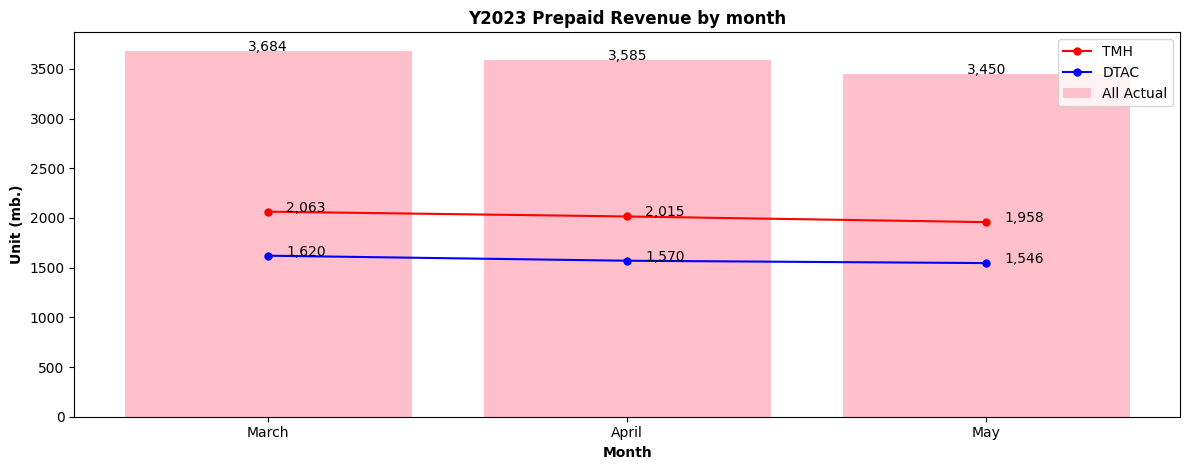

In [131]:
''' Chart '''
plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act_all, label='All Actual', color='Pink')
plt.plot(x_axis, y_act_tmh, marker='.', markeredgewidth=3, label='TMH', color='r')
plt.plot(x_axis, y_act_dtac, marker='.', markeredgewidth=3, label='DTAC', color='b')
for i in x_axis:    
    plt.annotate(str(format(y_act_all[i],',.0f')), xy=(x_axis[i], y_act_all[i]), ha='center')
    plt.annotate(str(format(y_act_tmh[i],',.0f')), xy=(x_axis[i]+0.05, y_act_tmh[i]))
    plt.annotate(str(format(y_act_dtac[i],',.0f')), xy=(x_axis[i]+0.05, y_act_dtac[i]))
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Prepaid Revenue by month', fontdict={'fontweight': 'bold'})
plt.legend()
plt.tight_layout()
plt.show()